In [1]:
import pandas as pd
import shap

In [6]:
df = pd.read_excel("FULL_INF_27_04_2024.xlsx", index_col=[0])


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14982 entries, 0 to 14981
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          14982 non-null  int64  
 1   Unnamed: 0     14982 non-null  int64  
 2   text_id        14982 non-null  int64  
 3   output_texts   14982 non-null  object 
 4   input_texts    14982 non-null  object 
 5   tags           14982 non-null  object 
 6   augmentation   14982 non-null  object 
 7   formulae_only  14982 non-null  bool   
 8   prediction     14982 non-null  object 
 9   metric         14982 non-null  float64
dtypes: bool(1), float64(1), int64(3), object(5)
memory usage: 1.2+ MB


In [8]:
df.drop(columns=['text_id','index','Unnamed: 0'], axis=1, inplace=True)

In [9]:
df.sample()

,output_texts,input_texts,tags,augmentation,formulae_only,prediction,metric
7125,**Намекать**_x000D_\n_x000D_\nКак насчет $a=\s...,**Намекать**_x000D_\n_x000D_\nКак насчет $ эй ...,real-analysis,synonyms,False,**Намекать** Как насчет $a=\sqrt{2}$. Что можн...,1.0


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt


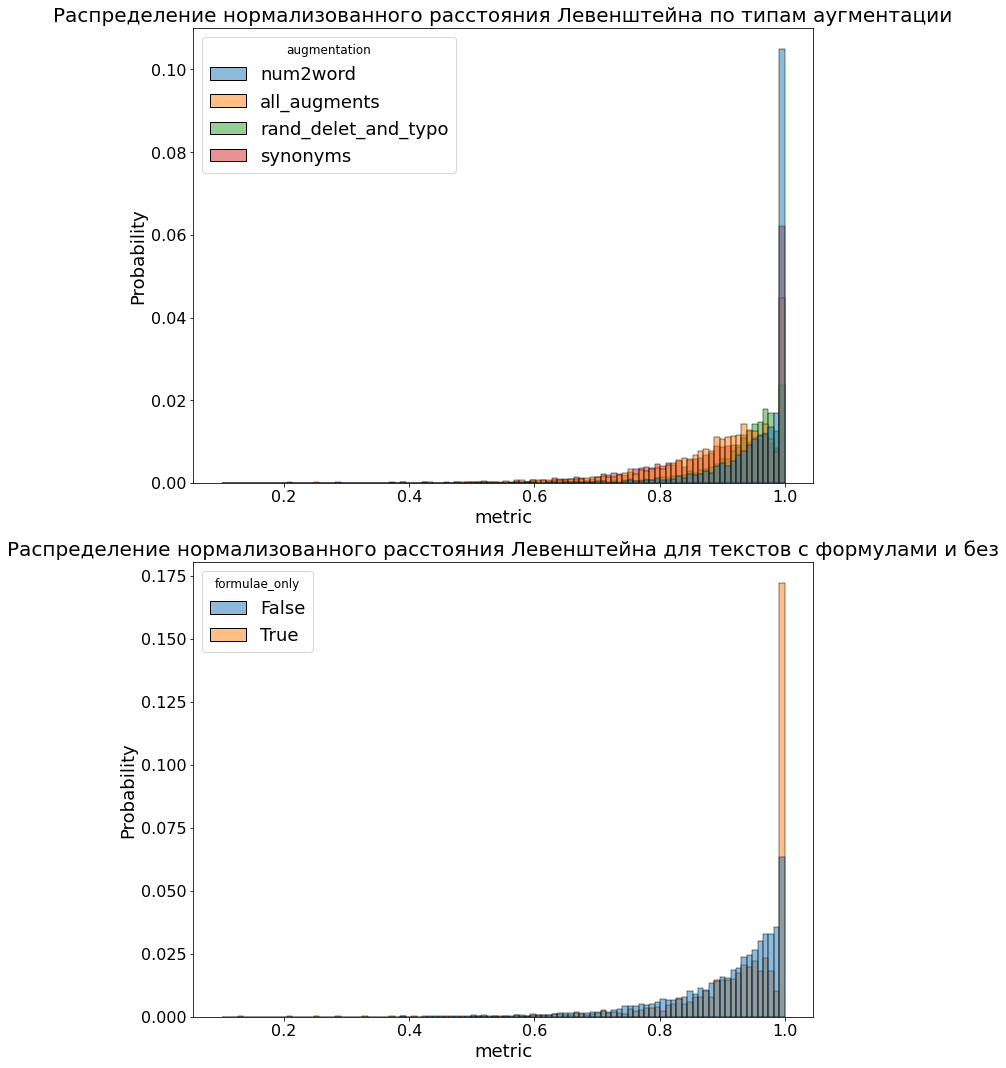

In [206]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 15))

sns.histplot(data=df, x='metric', hue='augmentation', multiple="layer", ax=axes[0],stat='probability')
axes[0].set_title('Распределение нормализованного расстояния Левенштейна по типам аугментации')

sns.histplot(data=df, x='metric', hue='formulae_only', multiple="layer", ax=axes[1],stat='probability')
axes[1].set_title('Распределение нормализованного расстояния Левенштейна для текстов с формулами и без')

plt.tight_layout()
plt.show()


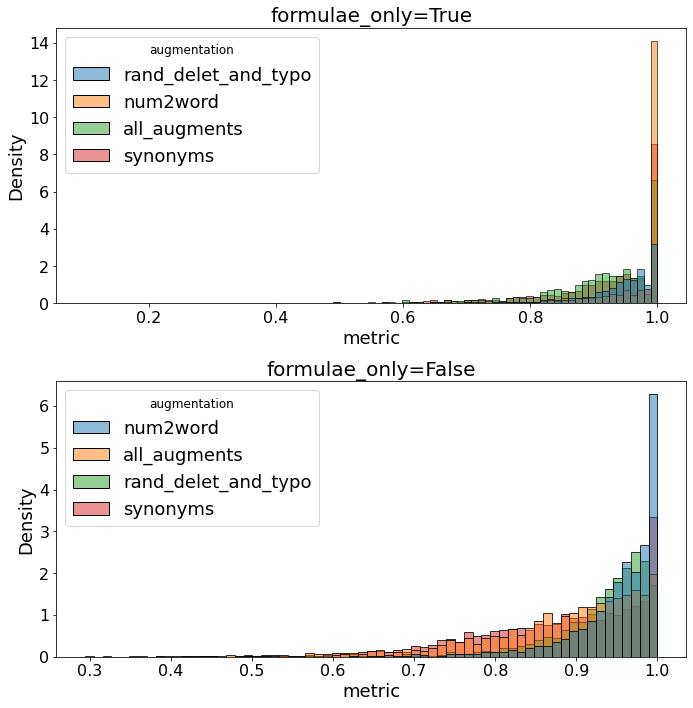

In [180]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))

sns.histplot(data=df[df['formulae_only'] == True], x='metric', hue='augmentation', multiple="layer", ax=axes[0], stat='density')
axes[0].set_title('formulae_only=True')

sns.histplot(data=df[df['formulae_only'] == False], x='metric', hue='augmentation', multiple="layer", ax=axes[1], stat='density')
axes[1].set_title('formulae_only=False')

plt.tight_layout()
plt.show()

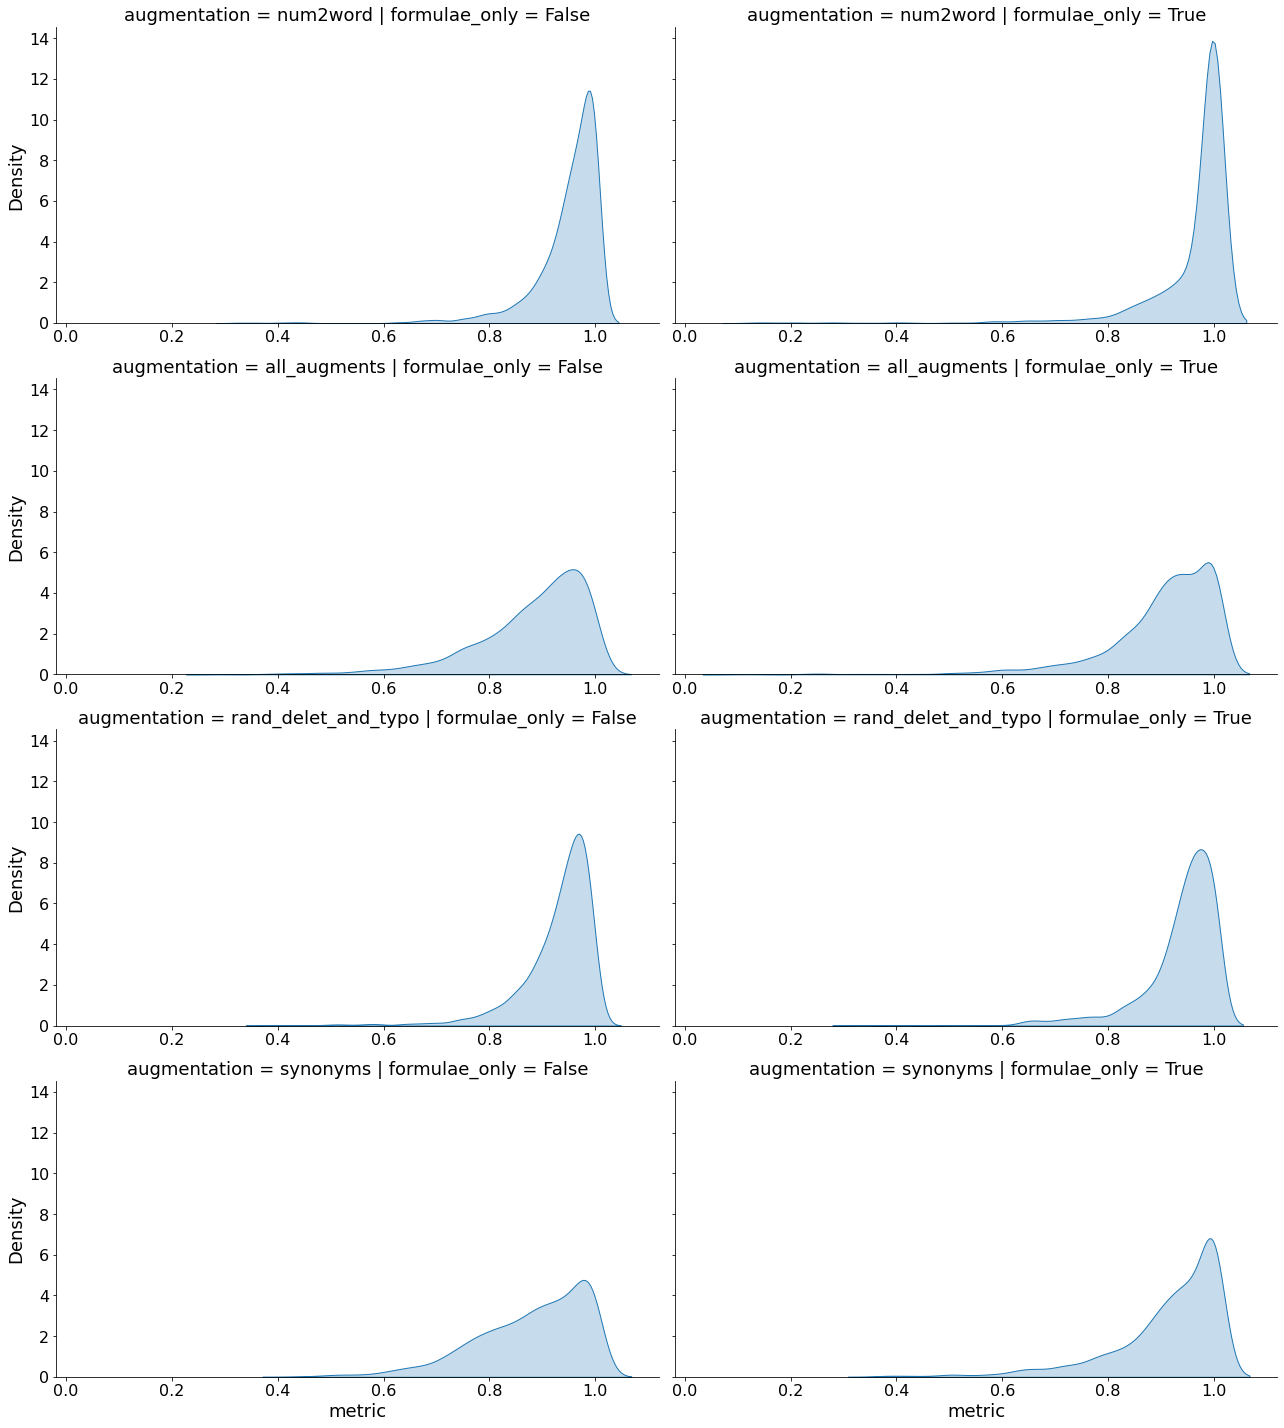

In [131]:
g = sns.FacetGrid(df, col='formulae_only', row='augmentation', height=5, aspect=1.8)
g.map(sns.kdeplot, 'metric', fill=True, clip_on=False, common_norm=False)

for ax in g.axes.flat:
    ax.tick_params(labelbottom=True)

plt.tight_layout()
plt.show()

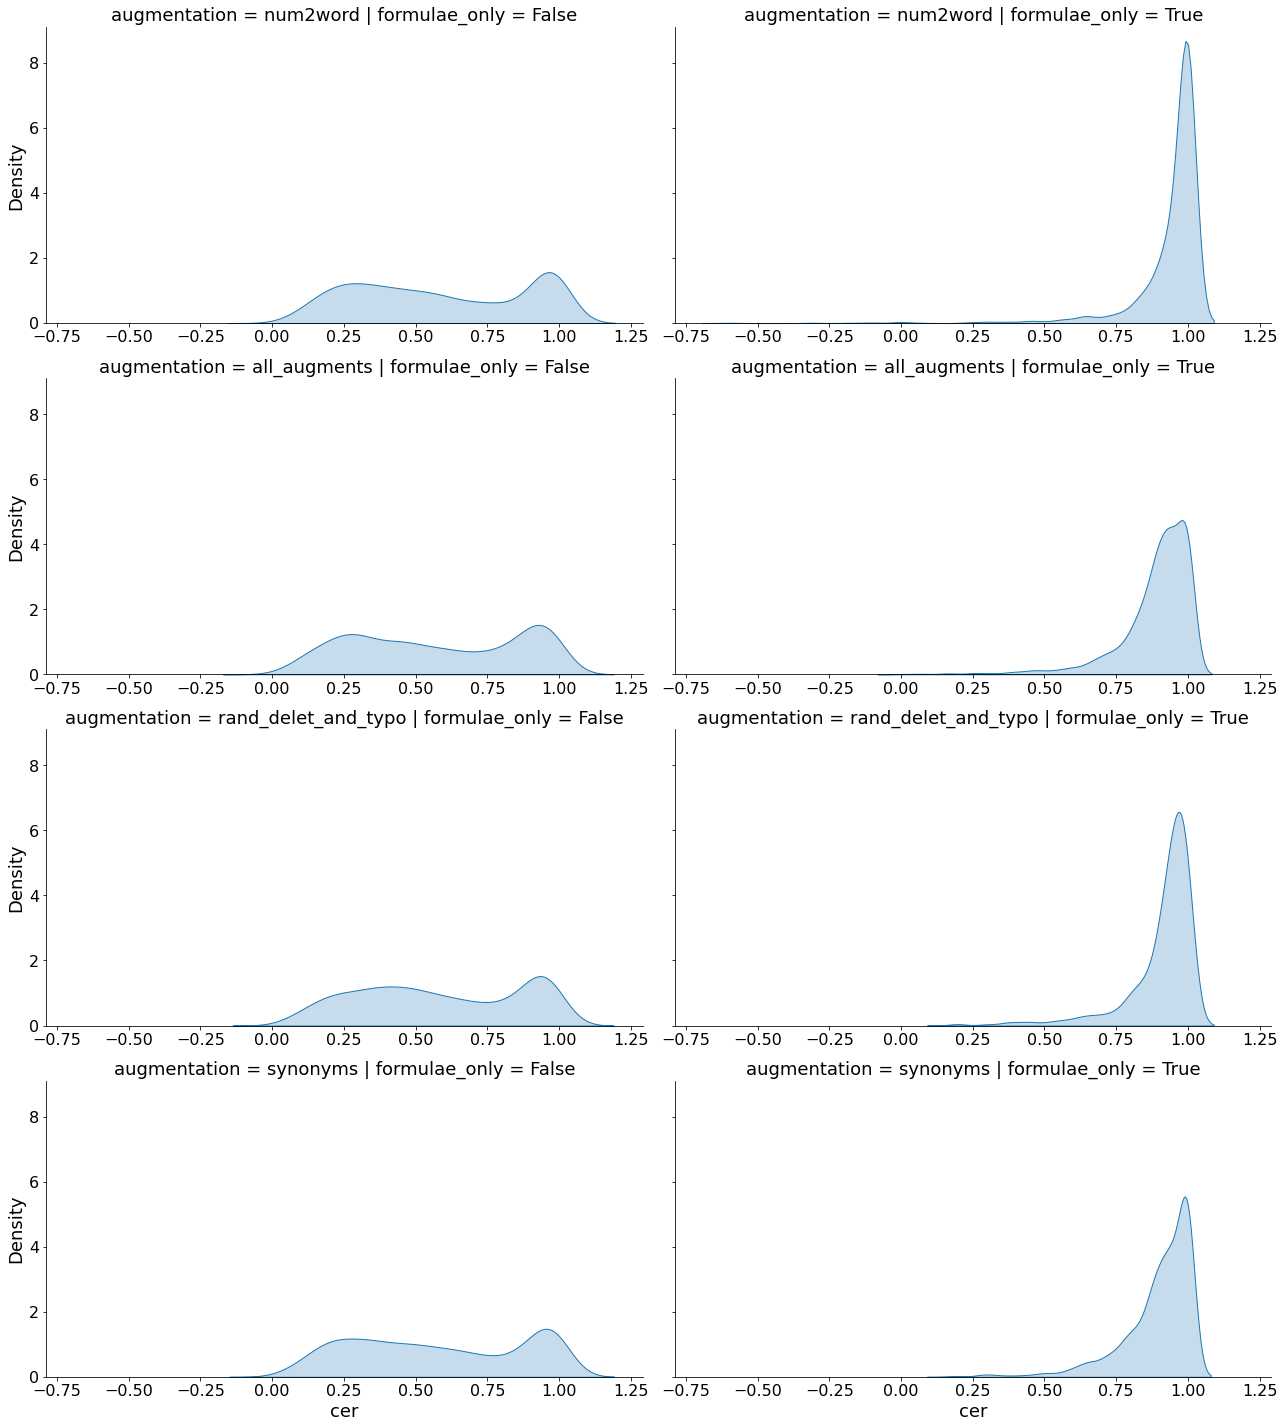

In [133]:
g = sns.FacetGrid(df, col='formulae_only', row='augmentation', height=5, aspect=1.8)
g.map(sns.kdeplot, 'cer', fill=True, clip_on=False, common_norm=False)

for ax in g.axes.flat:
    ax.tick_params(labelbottom=True)

plt.tight_layout()
plt.show()

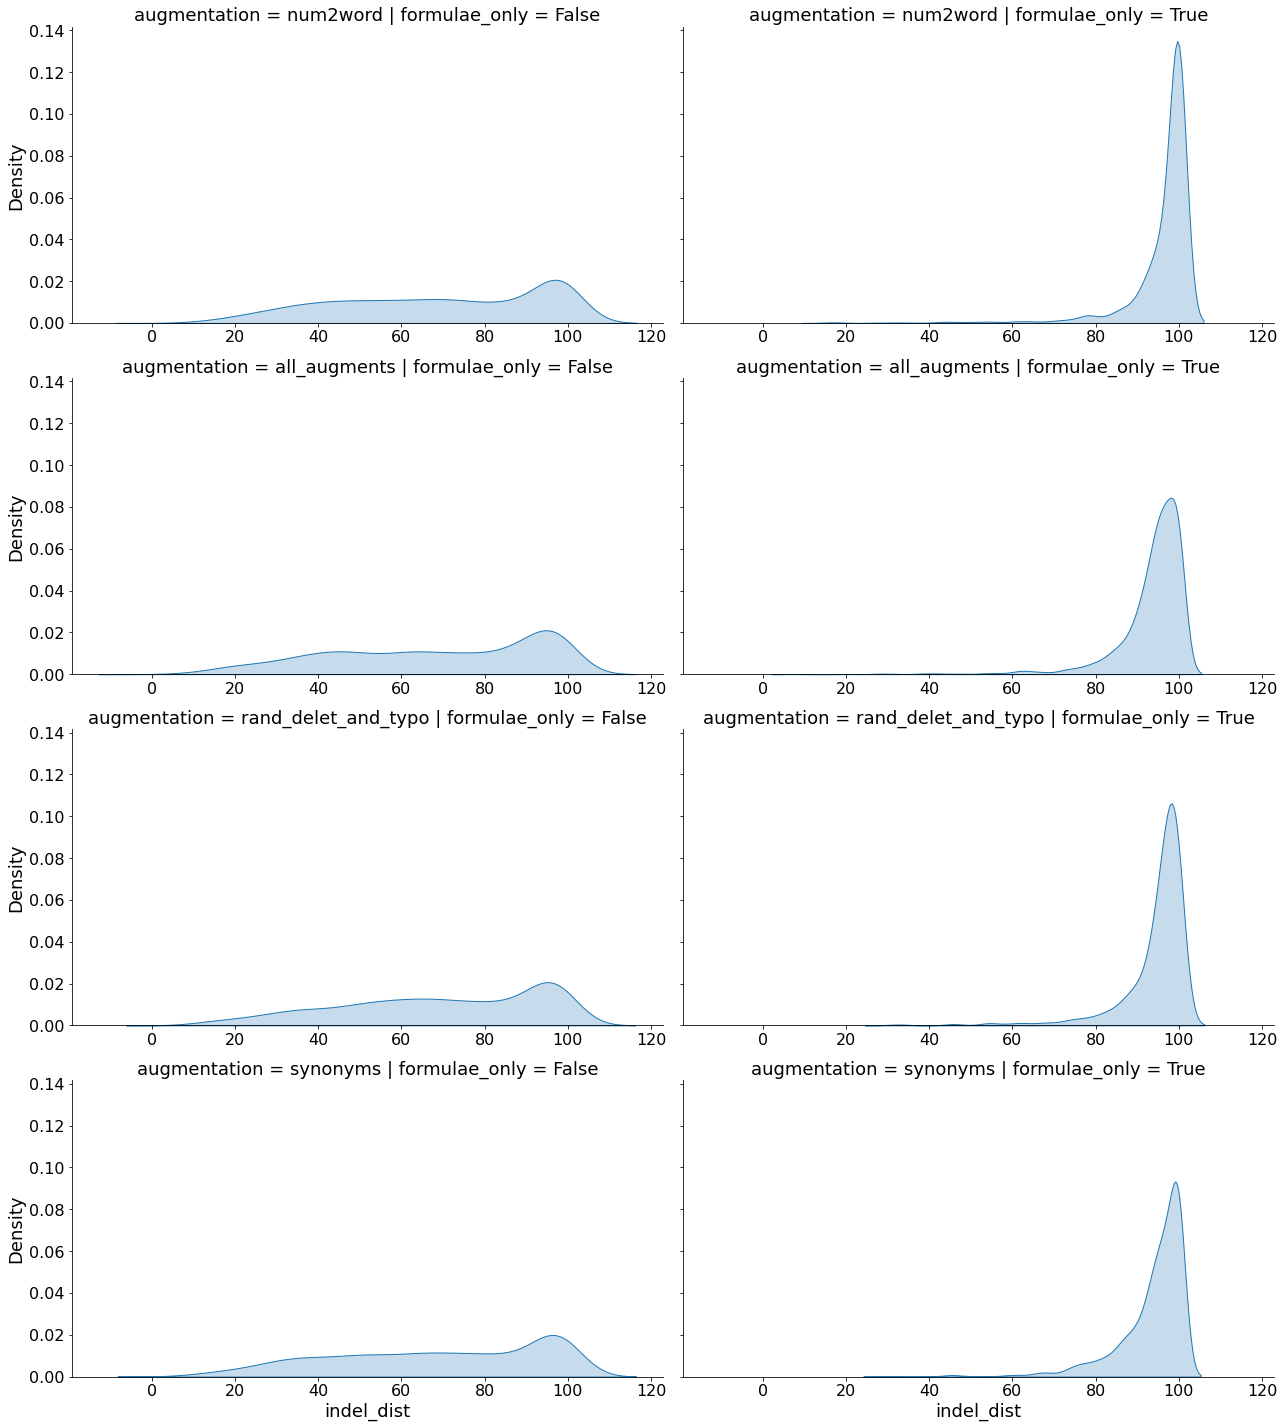

In [134]:
g = sns.FacetGrid(df, col='formulae_only', row='augmentation', height=5, aspect=1.8)
g.map(sns.kdeplot, 'indel_dist', fill=True, clip_on=False, common_norm=False)

for ax in g.axes.flat:
    ax.tick_params(labelbottom=True)

plt.tight_layout()
plt.show()

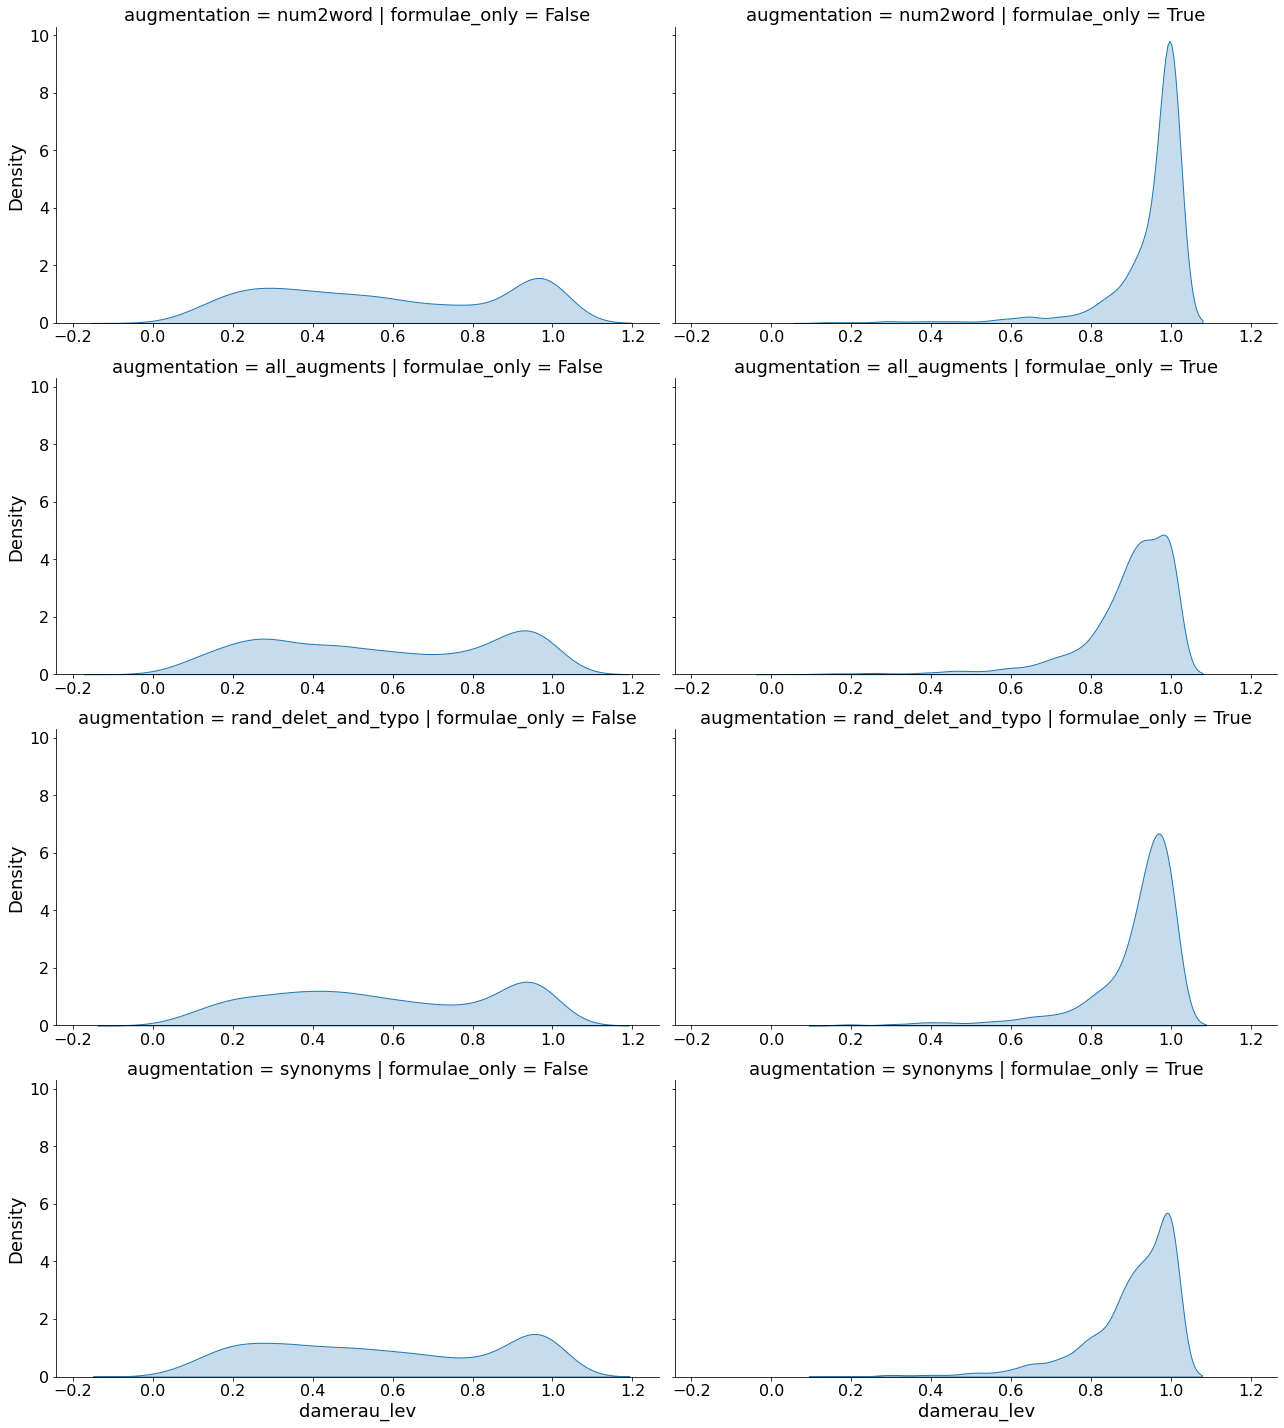

In [141]:
g = sns.FacetGrid(df, col='formulae_only', row='augmentation', height=5, aspect=1.8)
g.map(sns.kdeplot, 'damerau_lev', fill=True, clip_on=False, common_norm=False)

for ax in g.axes.flat:
    ax.tick_params(labelbottom=True)

plt.tight_layout()
plt.show()

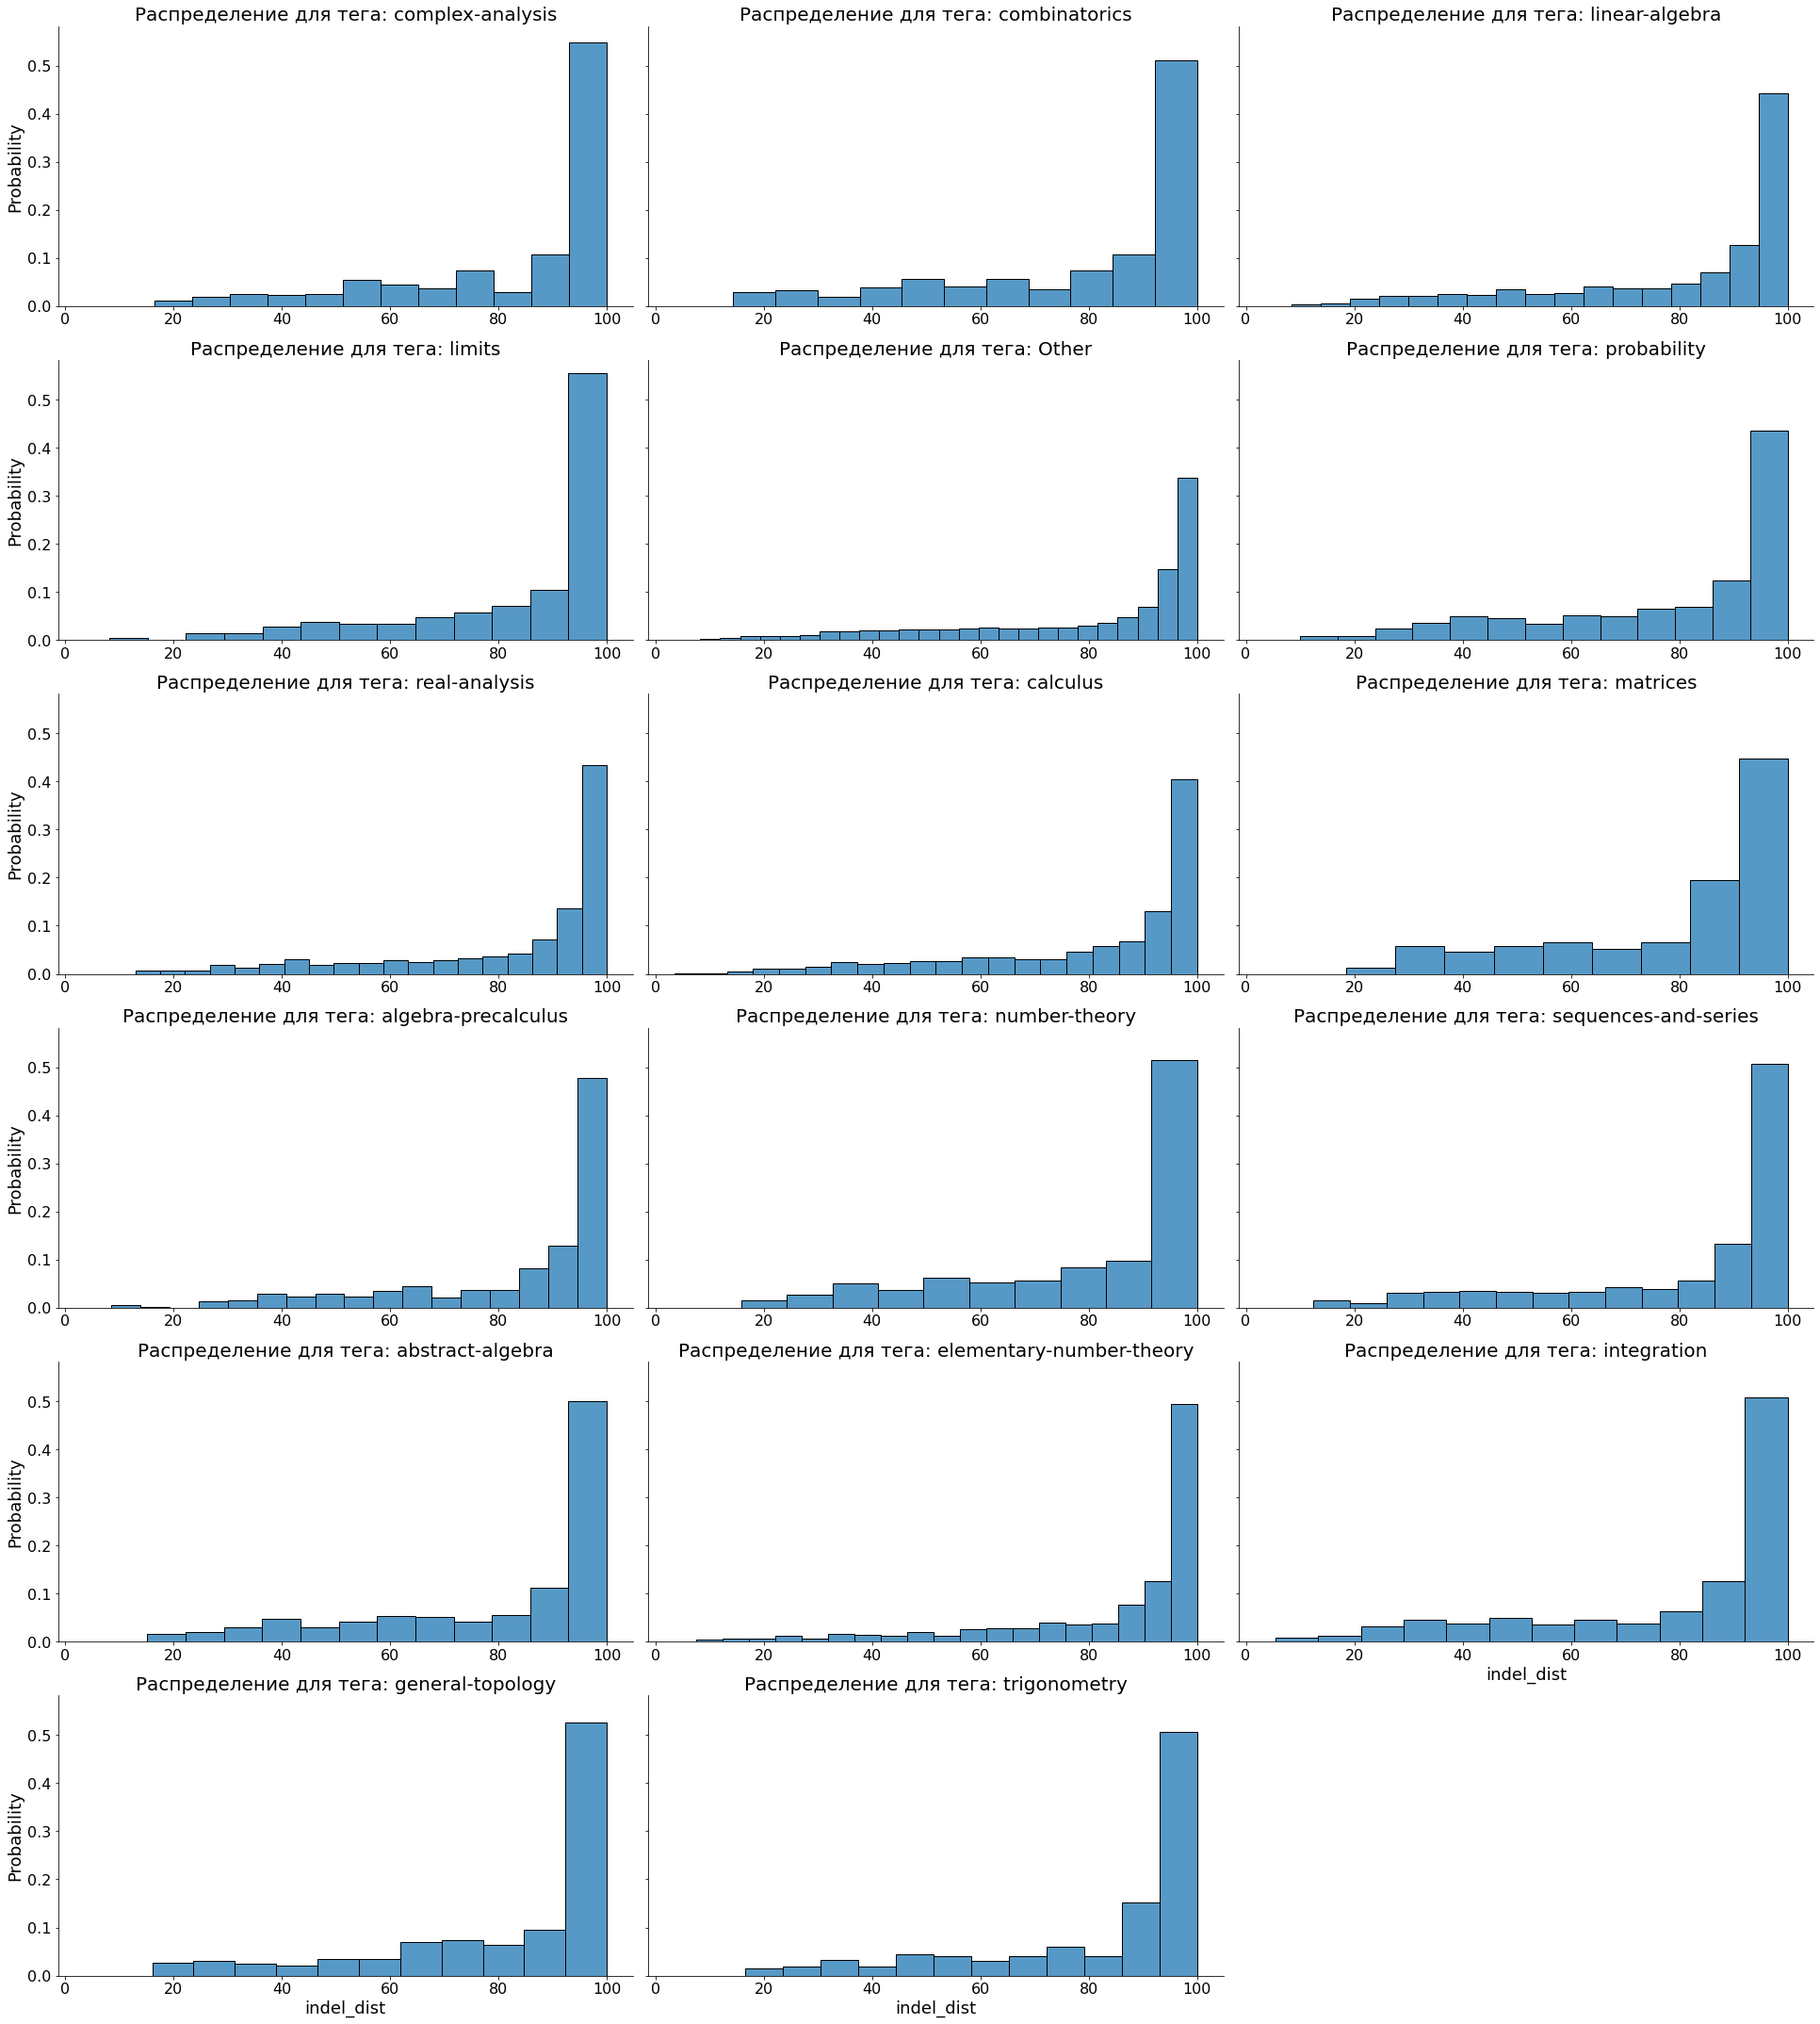

In [153]:
g = sns.FacetGrid(df, col='tags', col_wrap=3, height=5, aspect=1.8)
g.map(sns.histplot, 'indel_dist', stat='probability')

    
for ax, tag in zip(g.axes.flat, df['tags'].unique()):
    ax.set_title(f'Распределение для тега: {tag}')
    ax.tick_params(labelbottom=True)

plt.tight_layout()
plt.show()

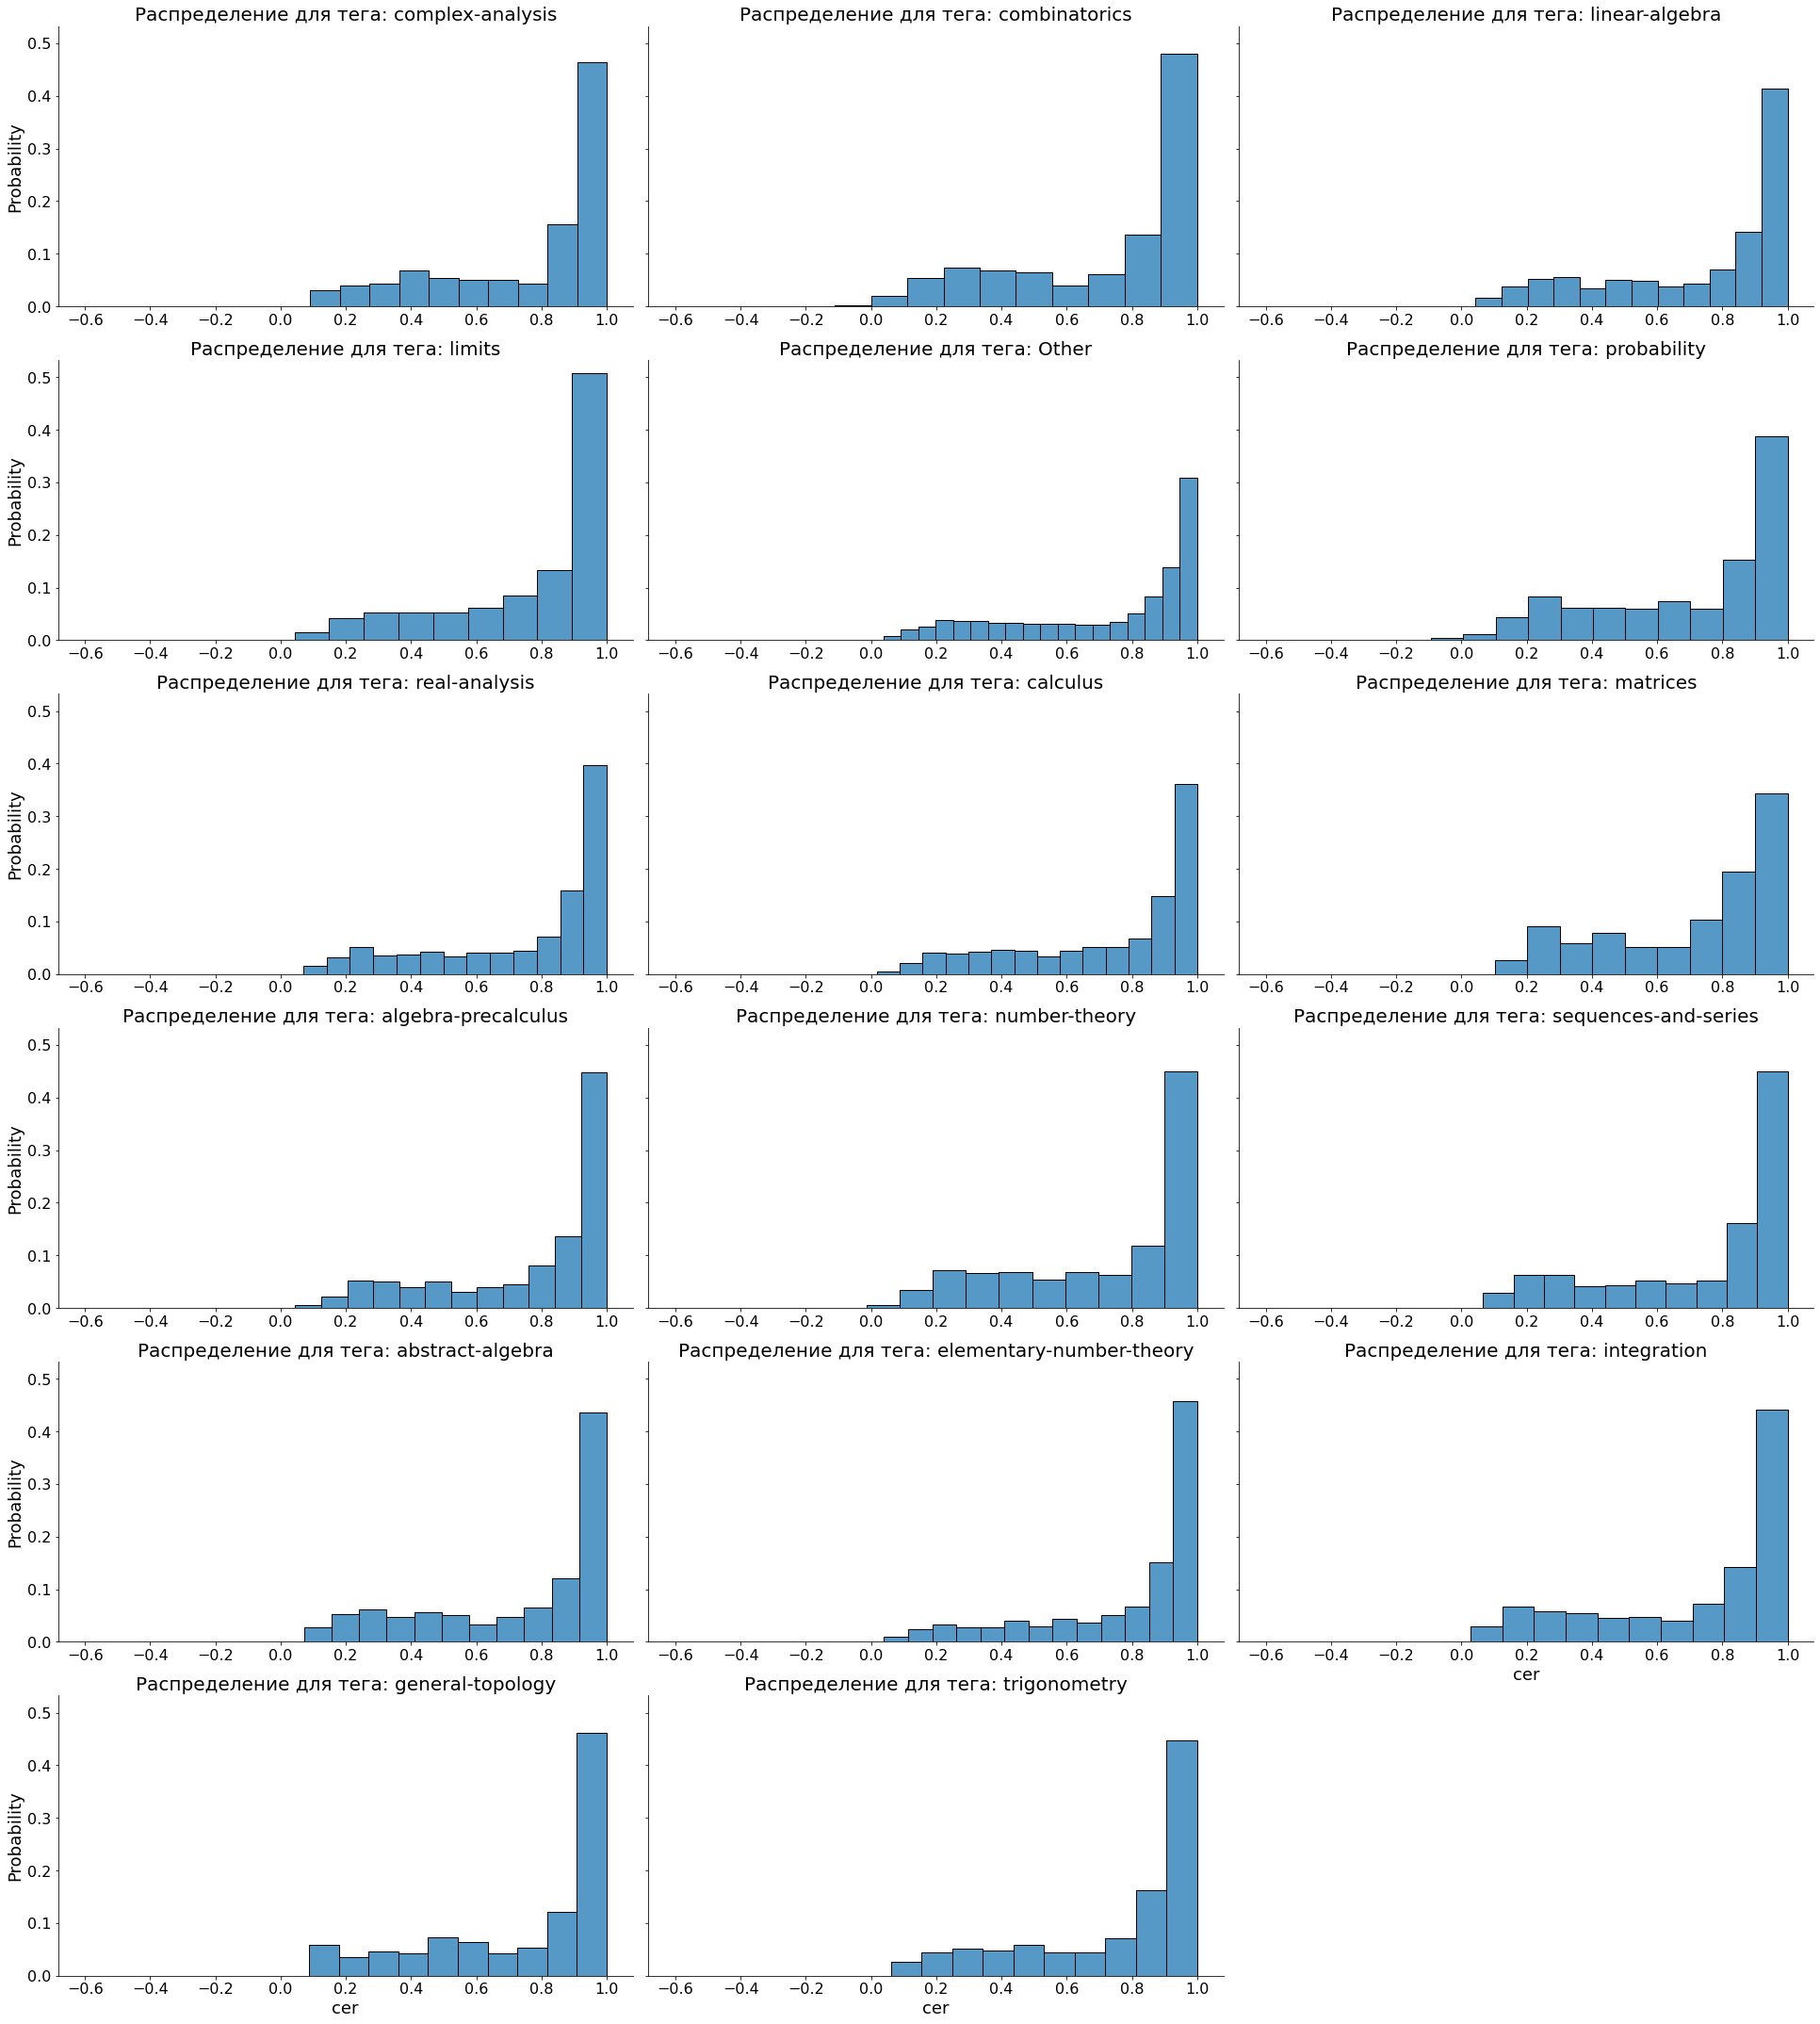

In [154]:
g = sns.FacetGrid(df, col='tags', col_wrap=3, height=5, aspect=1.8)
g.map(sns.histplot, 'cer', stat='probability')

    
for ax, tag in zip(g.axes.flat, df['tags'].unique()):
    ax.set_title(f'Распределение для тега: {tag}')
    ax.tick_params(labelbottom=True)

plt.tight_layout()
plt.show()

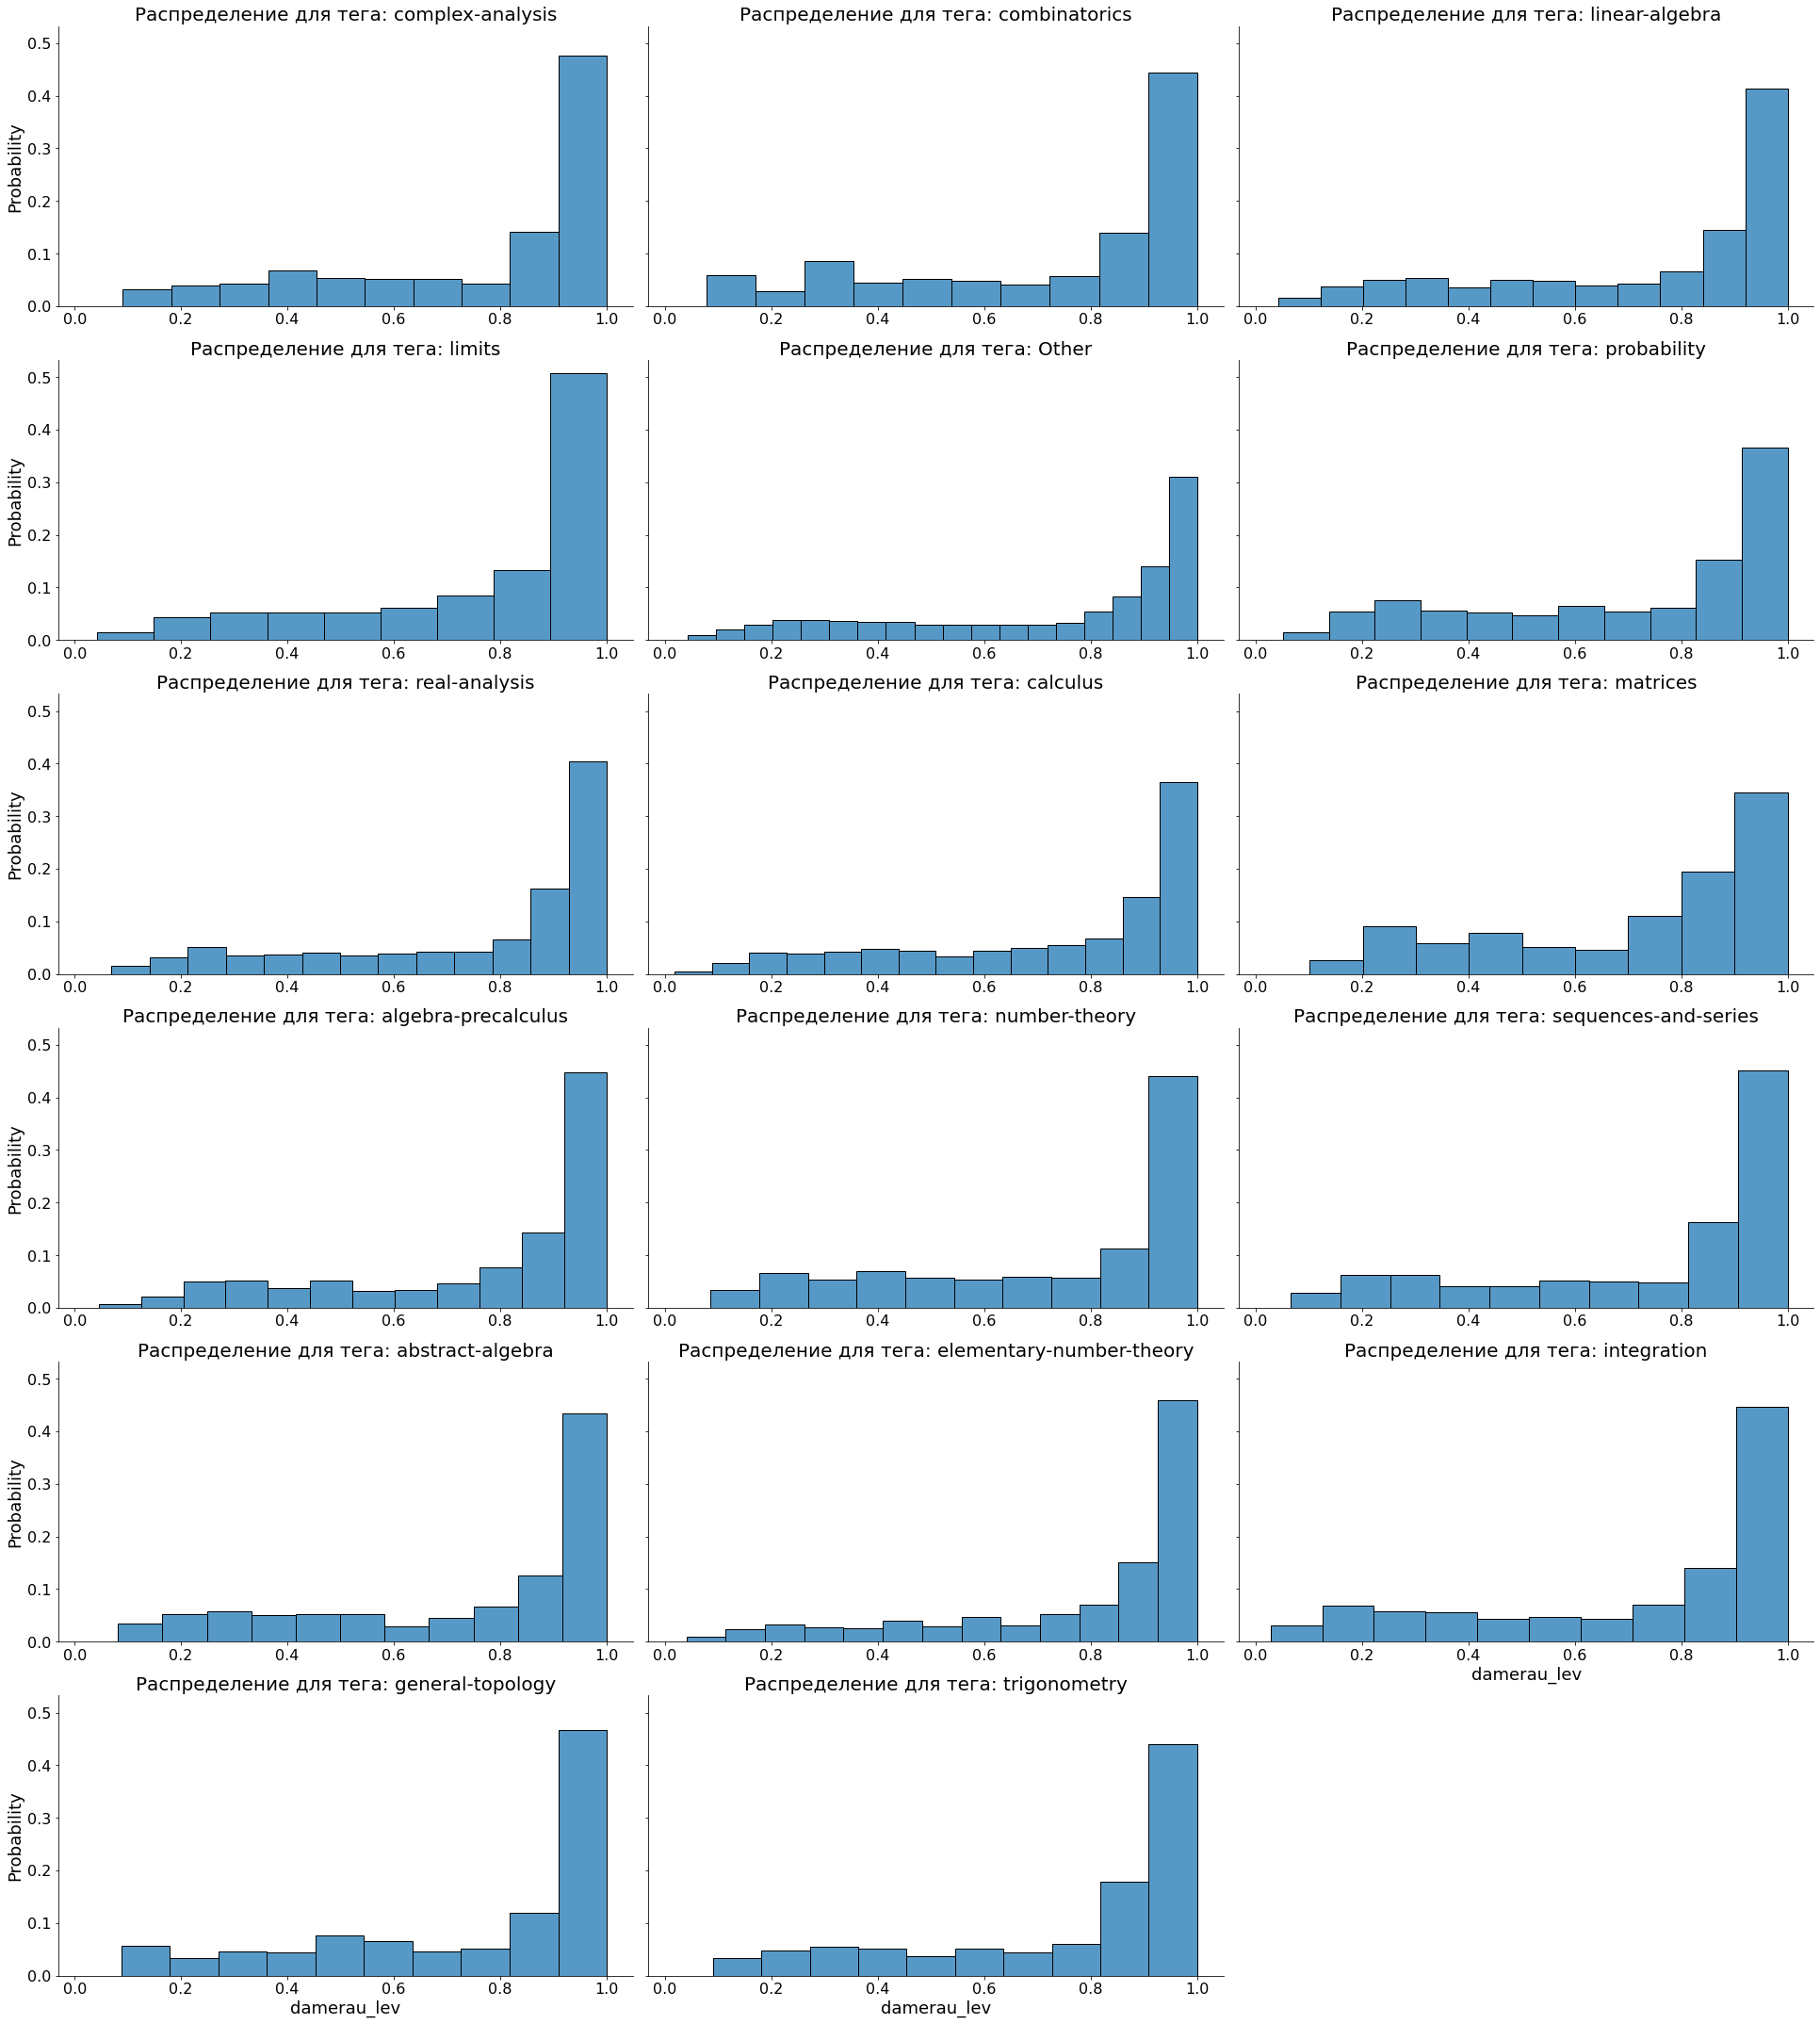

In [155]:
g = sns.FacetGrid(df, col='tags', col_wrap=3, height=5, aspect=1.8)
g.map(sns.histplot, 'damerau_lev', stat='probability')

    
for ax, tag in zip(g.axes.flat, df['tags'].unique()):
    ax.set_title(f'Распределение для тега: {tag}')
    ax.tick_params(labelbottom=True)

plt.tight_layout()
plt.show()

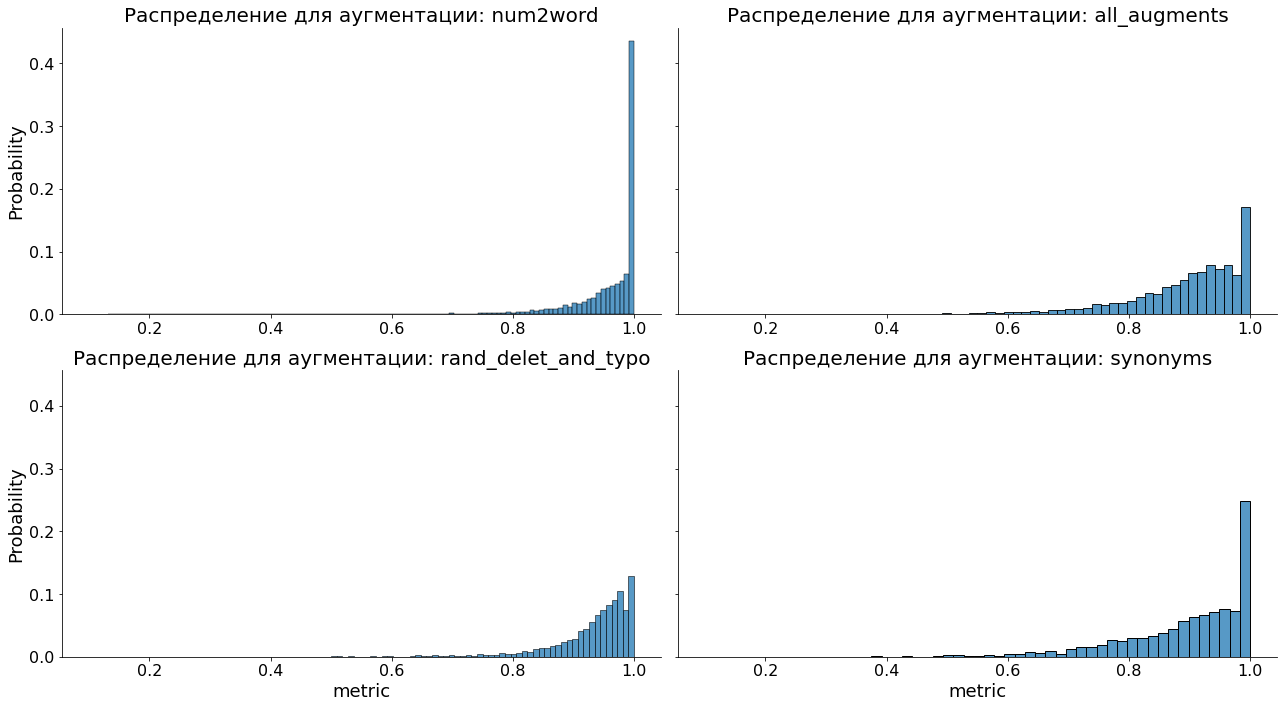

In [165]:
g = sns.FacetGrid(df, col='augmentation', col_wrap=2, height=5, aspect=1.8)
g.map(sns.histplot, 'metric', stat='probability')

    
for ax, tag in zip(g.axes.flat, df['augmentation'].unique()):
    ax.set_title(f'Распределение для аугментации: {tag}')
    ax.tick_params(labelbottom=True)

plt.tight_layout()
plt.show()

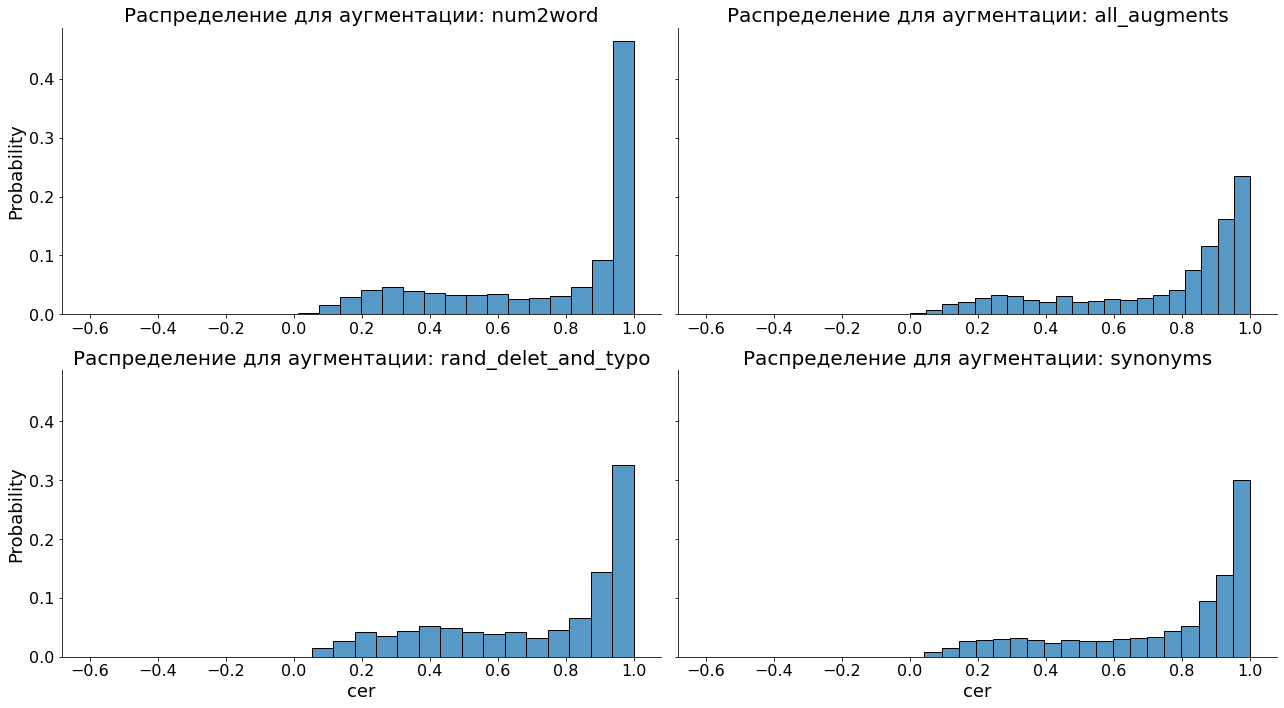

In [167]:
g = sns.FacetGrid(df, col='augmentation', col_wrap=2, height=5, aspect=1.8)
g.map(sns.histplot, 'cer', stat='probability')

    
for ax, tag in zip(g.axes.flat, df['augmentation'].unique()):
    ax.set_title(f'Распределение для аугментации: {tag}')
    ax.tick_params(labelbottom=True)

plt.tight_layout()
plt.show()

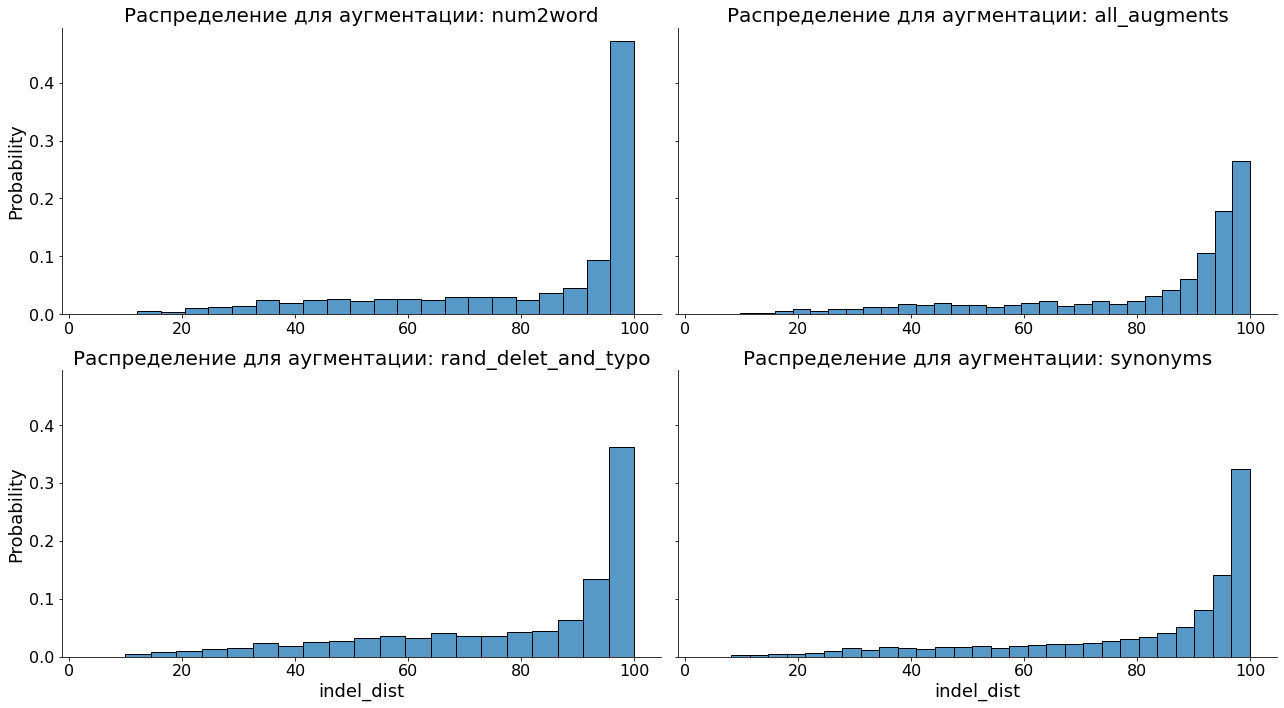

In [169]:
g = sns.FacetGrid(df, col='augmentation', col_wrap=2, height=5, aspect=1.8)
g.map(sns.histplot, 'indel_dist', stat='probability')

    
for ax, tag in zip(g.axes.flat, df['augmentation'].unique()):
    ax.set_title(f'Распределение для аугментации: {tag}')
    ax.tick_params(labelbottom=True)

plt.tight_layout()
plt.show()

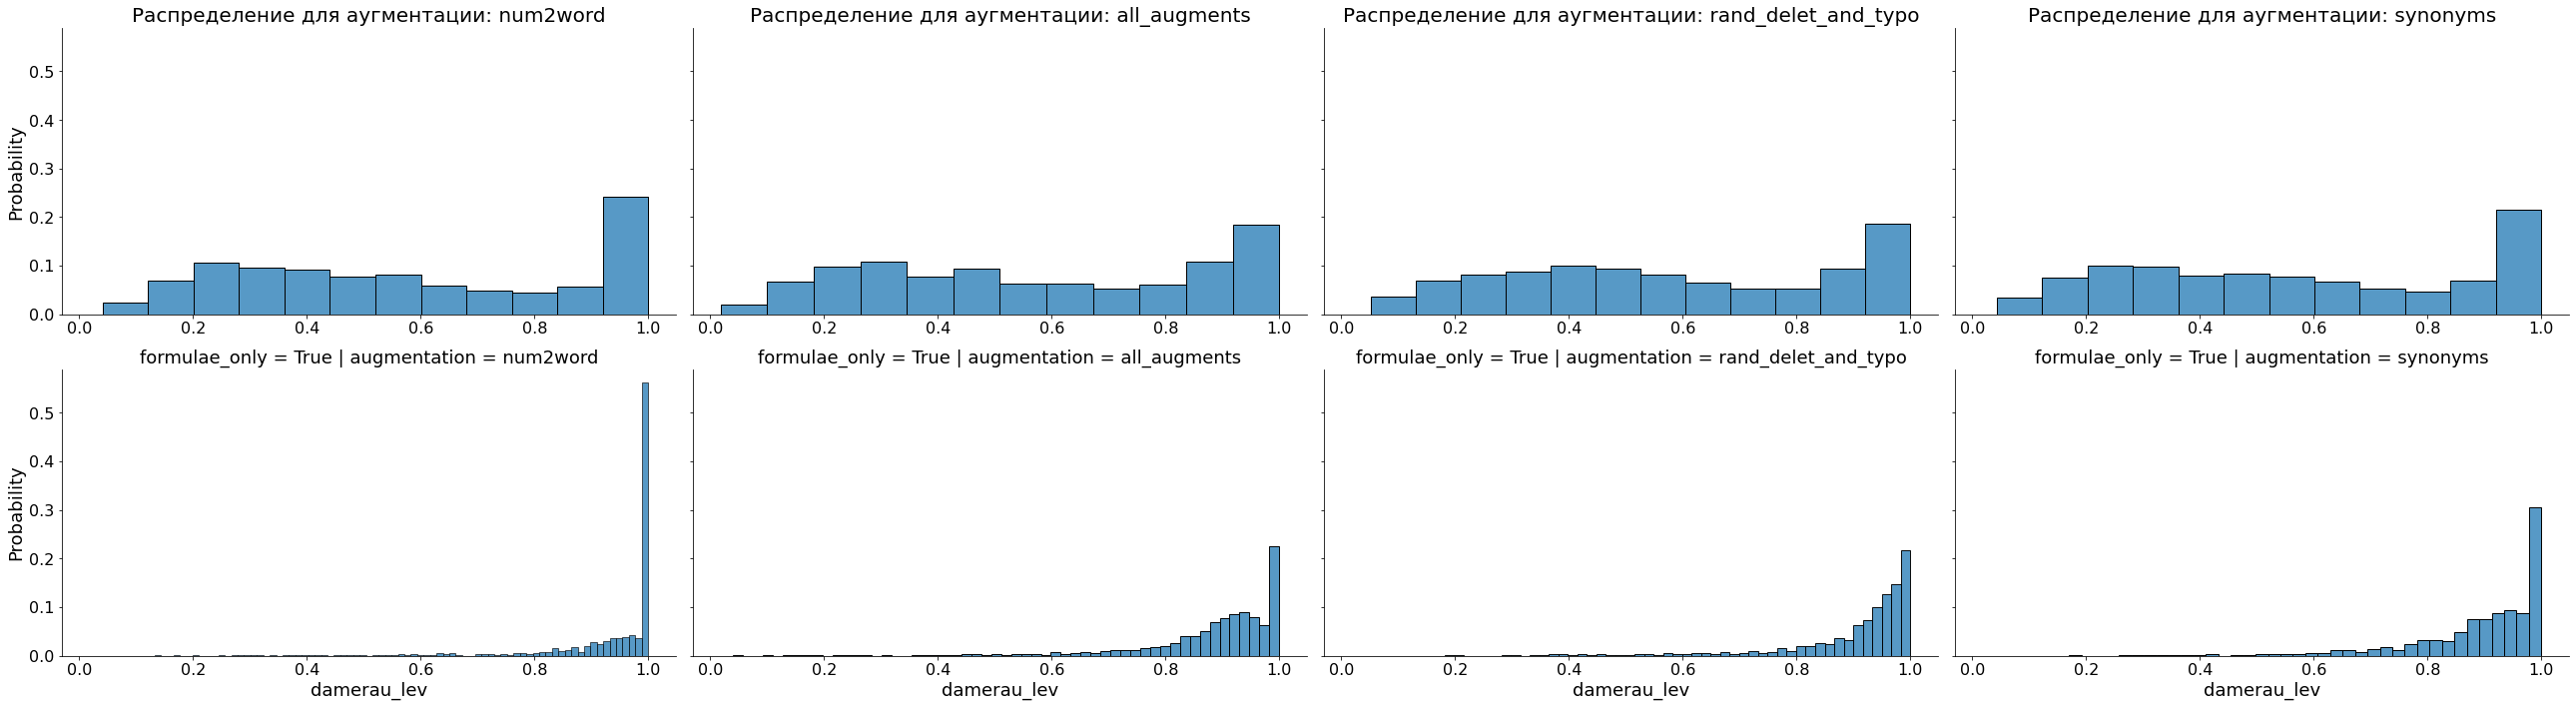

In [174]:
g = sns.FacetGrid(df, col='augmentation', row='formulae_only', height=5, aspect=1.8)
g.map(sns.histplot, 'damerau_lev', stat='probability')

    
for ax, tag in zip(g.axes.flat, df['augmentation'].unique()):
    ax.set_title(f'Распределение для аугментации: {tag}')
    ax.tick_params(labelbottom=True)

plt.tight_layout()
plt.show()

In [172]:
df.groupby('tags').median('metric').sort_values(by='metric', ascending=False).drop('formulae_only',axis=1)

,metric,indel_dist,cer,damerau_lev
tags,,,,
abstract-algebra,0.956656,92.887029,0.880952,0.882353
combinatorics,0.954545,92.473118,0.870690,0.870690
linear-algebra,0.952381,93.103448,0.880000,0.881481
elementary-number-theory,0.950918,95.081967,0.915726,0.916667
complex-analysis,0.950000,94.382022,0.895420,0.898718
number-theory,0.948103,92.067416,0.861506,0.866946
algebra-precalculus,0.947791,93.939394,0.894737,0.895928
limits,0.946667,94.409938,0.898734,0.898734
Other,0.945055,92.000000,0.866667,0.867052


In [13]:
df.groupby('tags').mean('metric').sort_values(by='metric', ascending=False).drop('formulae_only',axis=1)

,metric
tags,
combinatorics,0.924693
linear-algebra,0.922449
number-theory,0.921118
real-analysis,0.920690
abstract-algebra,0.920413
elementary-number-theory,0.919704
complex-analysis,0.918979
sequences-and-series,0.918323
limits,0.917834


In [14]:
df.groupby('tags').median('metric').sort_values(by='metric', ascending=False).drop('formulae_only',axis=1)

,metric
tags,
abstract-algebra,0.956656
combinatorics,0.954545
linear-algebra,0.952381
elementary-number-theory,0.950918
complex-analysis,0.950000
number-theory,0.948103
algebra-precalculus,0.947791
limits,0.946667
Other,0.945055


In [15]:
# сортируем по частотности тегов
# смотрим на среднее
tag_frequency = df['tags'].value_counts()
total_tags = len(df['tags'])
result = df.groupby('tags').mean('metric')
result_sorted = result.loc[tag_frequency.index]
result_sorted['frequency (%)'] = (tag_frequency / total_tags) * 100
result_sorted.drop('formulae_only',axis=1)

,metric,frequency (%)
Other,0.914920,36.717394
calculus,0.912917,11.273528
real-analysis,0.920690,7.722600
linear-algebra,0.922449,7.135229
probability,0.905539,4.825791
abstract-algebra,0.920413,4.558804
algebra-precalculus,0.916329,4.251769
elementary-number-theory,0.919704,3.617675
sequences-and-series,0.918323,3.223869
combinatorics,0.924693,2.810039


In [16]:
# смотрим на медиану
result_m = df.groupby('tags').median('metric')
result_sorted_m = result_m.loc[tag_frequency.index]
result_sorted_m['frequency (%)'] = (tag_frequency / total_tags) * 100
result_sorted_m.drop('formulae_only',axis=1)

,metric,frequency (%)
Other,0.945055,36.717394
calculus,0.939535,11.273528
real-analysis,0.943820,7.722600
linear-algebra,0.952381,7.135229
probability,0.941176,4.825791
abstract-algebra,0.956656,4.558804
algebra-precalculus,0.947791,4.251769
elementary-number-theory,0.950918,3.617675
sequences-and-series,0.943478,3.223869
combinatorics,0.954545,2.810039


In [17]:
df['tags'].value_counts()

Other                       5501
calculus                    1689
real-analysis               1157
linear-algebra              1069
probability                  723
abstract-algebra             683
algebra-precalculus          637
elementary-number-theory     542
sequences-and-series         483
combinatorics                421
integration                  399
general-topology             371
complex-analysis             352
number-theory                320
trigonometry                 270
limits                       211
matrices                     154
Name: tags, dtype: int64

In [19]:
exmpl=df[df['augmentation']=="num2word"].query("formulae_only").sample(20)

In [24]:
#!pip install rapidfuzz

In [137]:
from rapidfuzz import fuzz
from torchmetrics.text import CharErrorRate
from tqdm import tqdm
from rapidfuzz.distance import DamerauLevenshtein

In [242]:
df['damerau_lev'] = df.progress_apply(lambda row: DamerauLevenshtein.normalized_similarity(str(row['prediction']), str(row['output_texts'])), axis=1)

100%|███████████████████████████████████████████████████████████████████████████| 14982/14982 [00:33<00:00, 444.28it/s]


In [27]:
df.head()

,output_texts,input_texts,prediction,tags,augmentation,formulae_only,metric,indel_dist
0,"Проблемы этого типа, взятые из книг, часто уяз...","Проблемы этого типа, взятые из книг, часто уяз...","Проблемы этого типа, взятые из книг, часто уяз...",complex-analysis,num2word,False,0.985816,39.561992
1,"Чтобы две ладьи могли атаковать друг друга, он...","Чтобы две ладьи могли атаковать друг друга, он...","Чтобы две ладьи могли атаковать друг друга, он...",combinatorics,all_augments,False,0.984064,62.792167
2,Пусть $B_W$ — базис для $W$. Расширьте его до ...,Пусть B_W — базис для W. Расширьте его до бази...,Пусть $B_W$ — базис для W. Расширьте его до ба...,linear-algebra,rand_delet_and_typo,False,0.892256,61.915888
3,$$\r\n\left(1-\left(1-\frac1n\right)^{f(n)}\ri...,\r\n\left 1-\left 1-\frac1n\right)^{f n)}\ri...,$\left(1-\left(1-\frac1n\right)^{f(n)}\right)^...,limits,rand_delet_and_typo,True,0.952381,95.187166
4,$$x=5\pm2\sqrt{6}$$,$$x=пять\pmвторой\sqrt{шесть}$$,$$x=5\pm2\sqrt{6}$$,Other,num2word,True,1.000000,100.000000


In [28]:
cer = CharErrorRate()
tqdm.pandas()

In [230]:
df['cer'] = df.progress_apply(lambda row: cer(  str(row['prediction']), str(row['output_texts'])), axis=1)

100%|████████████████████████████████████████████████████████████████████████████| 14982/14982 [26:00<00:00,  9.60it/s]


In [232]:
df['cer'] = df['cer'].apply(lambda x: x.item())

In [243]:
df.groupby('tags').mean('cer').sort_values(by='metric', ascending=False).drop('formulae_only',axis=1)

,index,Unnamed: 0,metric,agg_diff_lev,difficulty,cer,damerau_lev
tags,,,,,,,
combinatorics,7791.028504,7519.211401,0.924693,0.651489,0.348511,0.266089,0.735389
linear-algebra,7430.025257,7521.066417,0.922449,0.644425,0.355575,0.254870,0.746075
number-theory,7644.675000,7248.343750,0.921118,0.632525,0.367475,0.268809,0.733766
real-analysis,7701.656871,7168.337079,0.920690,0.619316,0.380684,0.240790,0.760585
abstract-algebra,7290.641288,7261.254758,0.920413,0.654383,0.345617,0.260442,0.741076
elementary-number-theory,7621.525830,7491.905904,0.919704,0.605107,0.394893,0.209027,0.792281
complex-analysis,7647.911932,7877.593750,0.918979,0.647293,0.352707,0.234596,0.765941
sequences-and-series,7850.347826,7394.223602,0.918323,0.595673,0.404327,0.252549,0.748993
limits,7921.336493,7499.364929,0.917834,0.569062,0.430938,0.220716,0.779933


In [256]:
lev_plus_cer = df.groupby('tags').median('cer').sort_values(by='metric', ascending=False).drop(columns=['formulae_only','index','Unnamed: 0','agg_diff_lev'],axis=1).reset_index()

In [257]:
lev_plus_cer[['tags','difficulty','metric','cer']]

,tags,difficulty,metric,cer
0,abstract-algebra,0.287402,0.956656,0.119048
1,combinatorics,0.292793,0.954545,0.129310
2,linear-algebra,0.303614,0.952381,0.120000
3,elementary-number-theory,0.378878,0.950918,0.084274
4,complex-analysis,0.286565,0.950000,0.104580
5,number-theory,0.315913,0.948103,0.138494
6,algebra-precalculus,0.392952,0.947791,0.105263
7,limits,0.464286,0.946667,0.101266
8,Other,0.333333,0.945055,0.133333
9,real-analysis,0.334076,0.943820,0.111111


In [34]:
df.cer.median()

0.875

In [35]:
df.cer.mean()

0.7400032415156468

In [36]:
df.metric.median()

0.9454545454545454

In [37]:
df.metric.mean()

0.916101538446918

In [38]:
df.indel_dist.median()

92.66666666666666

In [39]:
df.indel_dist.mean()

81.22186029972504

In [58]:
!pip install squarify

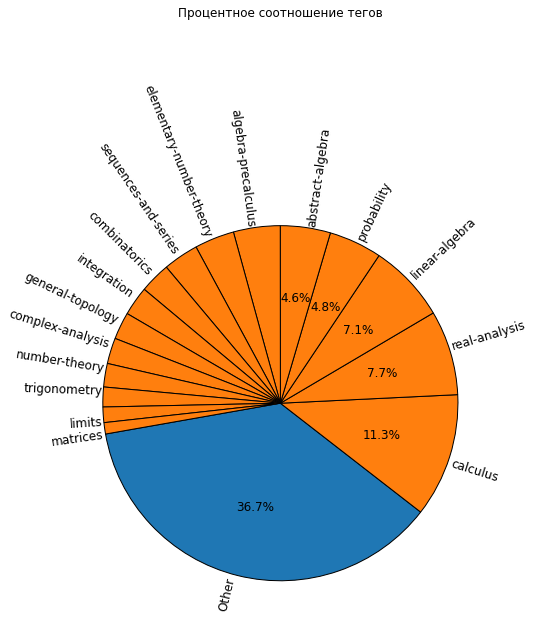

In [103]:


# Assuming `df` is your DataFrame and `tags` is the column with tag data
tag_counts = df['tags'].value_counts()
total = tag_counts.sum()
percentages = (tag_counts / total) * 100

# Create a list for labels that only includes tags with percentages 5% or more
labels = [f'{tag}'  for tag, percentage in zip(tag_counts.index, percentages)]

# Create a list of colors: "Other" gets a distinct color, all others get orange
colors = ['#ff7f0e' if tag != 'Other' else '#1f77b4' for tag in tag_counts.index]

plt.figure(figsize=(7, 7))
plt.pie(tag_counts, labels=labels, colors=colors, autopct=lambda p: f'{p:.1f}%' if p >= 4.5
        else '',
        startangle=190, labeldistance=1, textprops={'fontsize': 12}, rotatelabels=True, wedgeprops={'edgecolor': 'black'})
plt.title('Процентное соотношение тегов', y=1.5)
plt.axis('equal')
plt.show()




In [229]:
df.groupby('tags').median('cer').sort_values(by='metric', ascending=False).drop('formulae_only',axis=1)

,index,Unnamed: 0,metric,agg_diff_lev,difficulty
tags,,,,,
abstract-algebra,7159.0,7237.0,0.956656,0.712598,0.287402
combinatorics,7769.0,7417.0,0.954545,0.707207,0.292793
linear-algebra,7487.0,7758.0,0.952381,0.696386,0.303614
elementary-number-theory,7590.5,7665.0,0.950918,0.621122,0.378878
complex-analysis,8013.0,8217.5,0.950000,0.713435,0.286565
number-theory,7868.5,6918.0,0.948103,0.684087,0.315913
algebra-precalculus,7371.0,7585.0,0.947791,0.607048,0.392952
limits,8510.0,7296.0,0.946667,0.535714,0.464286
Other,7416.0,7537.0,0.945055,0.666667,0.333333


In [181]:
df

,output_texts,input_texts,prediction,tags,augmentation,formulae_only,metric,indel_dist,cer,damerau_lev
0,"Проблемы этого типа, взятые из книг, часто уяз...","Проблемы этого типа, взятые из книг, часто уяз...","Проблемы этого типа, взятые из книг, часто уяз...",complex-analysis,num2word,False,0.985816,39.561992,0.247023,0.247022
1,"Чтобы две ладьи могли атаковать друг друга, он...","Чтобы две ладьи могли атаковать друг друга, он...","Чтобы две ладьи могли атаковать друг друга, он...",combinatorics,all_augments,False,0.984064,62.792167,0.458834,0.458834
2,Пусть $B_W$ — базис для $W$. Расширьте его до ...,Пусть B_W — базис для W. Расширьте его до бази...,Пусть $B_W$ — базис для W. Расширьте его до ба...,linear-algebra,rand_delet_and_typo,False,0.892256,61.915888,0.448393,0.448393
3,$$\r\n\left(1-\left(1-\frac1n\right)^{f(n)}\ri...,\r\n\left 1-\left 1-\frac1n\right)^{f n)}\ri...,$\left(1-\left(1-\frac1n\right)^{f(n)}\right)^...,limits,rand_delet_and_typo,True,0.952381,95.187166,0.922280,0.922280
4,$$x=5\pm2\sqrt{6}$$,$$x=пять\pmвторой\sqrt{шесть}$$,$$x=5\pm2\sqrt{6}$$,Other,num2word,True,1.000000,100.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...
14977,$$ \sum_{n\geq 2}\frac{a_n^2}{2n+1}\geq 0 \tag...,$$ \sum_{n\geq два}\frac{a_n^второй}{дваn+перв...,$$ \sum_{n\geq 2}\frac{a_n^2}{2n+1}\geq 0 \tag...,Other,num2word,True,1.000000,100.000000,1.000000,1.000000
14978,\begin{align}\r\n\lambda^*(E)+\lambda^*(E^\com...,\begin{align \r\n\lambda^*( э прописная плюс...,\begin{align} \lambda^*(E + \lambda^*(E^\compl...,real-analysis,all_augments,True,0.595142,48.401826,0.318275,0.318275
14979,$$ = b_i*b_m+s*b*b_i-x*b*b_i+b_m*x*i+s*b*x*i-b...,$$ равняется би _ и * бэ _ эм +s*b* бэ _i-x...,$$=b_i*b_m+s^b*b_i-x^b*b_i+b_m*x^i+s^b*x^i-b^i$$,Other,synonyms,True,0.777778,82.352941,0.777778,0.777778
14980,$$ t\leq m(U_t)\leq t\sum_{n=1}^{\infty}2^{1-n...,t\leq m(U_t)\leq t\sum_{n=1}У{\infty}2^{1-n}=2t,$t\leq m(U_t)\leq t\sum_{n=1}^{\infty}2^{1-n}=2t$,Other,rand_delet_and_typo,True,0.924528,96.078431,0.924528,0.924528


In [185]:
df[(df.formulae_only==True) & (df.metric > 0.8)].output_texts.str.len().median()

37.0

In [192]:
df[(df.formulae_only==False) & (df.metric < 0.3)].output_texts.str.len().median()

245.0

In [194]:
import numpy as np

In [198]:
from rapidfuzz.distance import Levenshtein

In [245]:
df['difficulty'] = df.progress_apply(lambda row: Levenshtein.normalized_distance(str(row['input_texts']), str(row['output_texts'])), axis=1)

100%|█████████████████████████████████████████████████████████████████████████| 14982/14982 [00:01<00:00, 12791.95it/s]


In [260]:
df[df.difficulty==1].groupby('tags').median('cer').sort_values(by='metric', ascending=False).drop(columns=['formulae_only','index','Unnamed: 0','agg_diff_lev'],axis=1).reset_index()

,tags,metric,difficulty,cer,damerau_lev
0,Other,0.875,1.0,0.125,0.875


In [272]:
df[(df.difficulty>=0.1)&(df.input_texts.str.len()>50)].groupby('augmentation').median('cer').sort_values(by='metric', ascending=False).drop(columns=['formulae_only','index','Unnamed: 0','agg_diff_lev'],axis=1).reset_index()

,augmentation,metric,difficulty,cer,damerau_lev
0,num2word,0.967647,0.244186,0.105263,0.894737
1,rand_delet_and_typo,0.920898,0.125620,0.112349,0.887651
2,synonyms,0.915254,0.547945,0.170213,0.833333
3,all_augments,0.911765,0.547718,0.168831,0.835616
